# Shelf Life Study : Data Science in Research & Development

Snack product shelf life is determined with a specific test protocol. As samples age, a sensory panel evaluates the aged sample versus a fresh sample. The dataset consists of 81 individual shelf life studies (Identified by the Study Number column) across a wide variety of snack products. Each of these studies has one or more samples. The column in the dataset named “Difference From Fresh” is the response from the sensory panel that were aged and evaluated by the sensory panel. Without going into the details of how this measure is generated, when this value is 20 or greater the aged sample at that time point is considered different enough from fresh that the product has reached its maximum shelf life.

## Preparation

### Importing Necessary Modules and Data

In [463]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [464]:
%matplotlib inline

In [546]:
df = pd.read_csv('/Users/liudingning/Desktop/sum/pepsi.co/shelf-life-study-data.csv')

In [547]:
df.head()

,Study Number,Sample ID,Product Type,Base Ingredient,Process Type,Sample Age (Weeks),Difference From Fresh,Storage Conditions,Packaging Stabilizer Added,Transparent Window in Package,Processing Agent Stability Index,Preservative Added,Moisture (%),Residual Oxygen (%),Hexanal (ppm)
0,1310186,1310186-1,D,NaN,C,0.0,0.0,NaN,NaN,NaN,16.2,NaN,NaN,NaN,NaN
1,1310186,1310186-1,D,NaN,C,10.0,0.0,NaN,NaN,NaN,16.2,NaN,1.56,2.87,0.10
2,1310186,1310186-1,D,NaN,C,14.0,0.0,NaN,NaN,NaN,16.2,NaN,1.64,2.95,0.10
3,1310186,1310186-1,D,NaN,C,16.0,3.3,NaN,NaN,NaN,16.0,NaN,1.60,7.13,0.09
4,1310186,1310186-1,D,NaN,C,18.0,2.7,NaN,NaN,NaN,16.0,NaN,1.70,12.73,0.47


In [548]:
#The number of rows and columns of train data
print('Number of rows:',df.shape[0]) 
print('Number of columns:',df.shape[1])

Number of rows: 749
Number of columns: 15


In [549]:
#df.get_dtype_counts()
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 15 columns):
Study Number                        749 non-null int64
Sample ID                           749 non-null object
Product Type                        749 non-null object
Base Ingredient                     640 non-null object
Process Type                        749 non-null object
Sample Age (Weeks)                  749 non-null float64
Difference From Fresh               749 non-null float64
Storage Conditions                  455 non-null object
Packaging Stabilizer Added          467 non-null object
Transparent Window in Package       102 non-null object
Processing Agent Stability Index    749 non-null float64
Preservative Added                  269 non-null object
Moisture (%)                        513 non-null float64
Residual Oxygen (%)                 420 non-null float64
Hexanal (ppm)                       289 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usa

## Data Processing

#### Missing Values

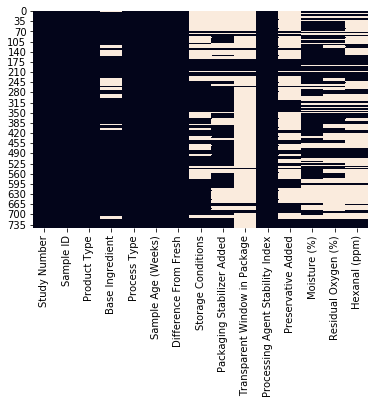

In [550]:
sns.heatmap(df.isnull(),cbar=False)

We can see there are lots of missing values for 'Transparent Window for Package', 'Preservative Added', 'Hexanal', etc. For the same product type, snackes usually are packed in the same condition, so we can fill our missing value with the most common situation in each product type. For some product types totally missing whole value, then we fill it with average value.

In [551]:
#For numerical data

miss_numeric = ['Moisture (%)', 'Residual Oxygen (%)', 'Hexanal (ppm)']
for i in miss_numeric:
    df[i] = df.groupby('Product Type')[i].transform(lambda x: x.fillna(x.mean()))

for i in miss_numeric:
    df[i] = df[i].fillna(df[i].mean())

,Study Number,Sample Age (Weeks),Difference From Fresh,Processing Agent Stability Index,Moisture (%),Residual Oxygen (%),Hexanal (ppm)
Product Type,,,,,,,
A,1.599976e+06,23.197183,8.970423,16.000000,1.837500,20.582500,0.682754
B,1.530594e+06,16.785714,8.635714,14.750000,2.650857,13.344640,0.652222
C,1.515142e+06,15.166667,12.041667,16.112500,2.147667,20.730000,1.000000
D,1.493279e+06,15.923077,3.384615,15.734615,8.260588,13.067273,0.447000
E,1.530732e+06,11.951613,12.131855,14.249597,1.891237,11.672043,0.631375
F,1.536929e+06,12.425287,5.881609,15.645977,2.172000,12.480185,0.568214
G,1.492614e+06,11.850000,16.665000,16.300000,1.192500,14.998421,0.682754
H,1.502935e+06,17.932099,12.081481,15.748148,1.948879,10.645172,0.777313
I,1.586147e+06,14.545455,30.390909,16.000000,4.657500,13.344640,0.682754


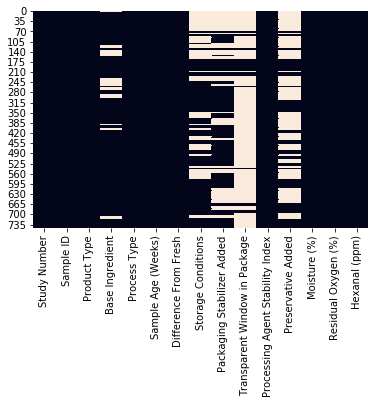

In [552]:
#check
sns.heatmap(df.isnull(),cbar=False)
df_numeric = df.groupby('Product Type')
df_numeric.mean()

In [553]:
#For categorical data
miss_category = ['Base Ingredient', 'Storage Conditions', 'Packaging Stabilizer Added','Transparent Window in Package', 'Preservative Added']
for i in miss_category:
    df[i] = df.groupby('Product Type')[i].transform(lambda x: x.fillna(x.mode()))
for i in miss_category:
    df[i] = df[i].fillna(df[i].mode()[0])


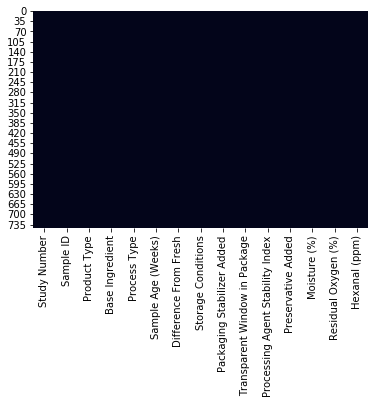

In [554]:
#check
sns.heatmap(df.isnull(),cbar=False)

#### The response
The 'Difference from Fresh'evaluates the aged sample versus a fresh sample. When this value is 20 or greater the aged sample at that time point is considered different enough from fresh that the product has reached its maximum shelf life.

In [555]:
df['DifferFromFresh'] = 0
df.loc[df['Difference From Fresh']>=20,'DifferFromFresh'] = 'Yes'
df.loc[df['Difference From Fresh']<20, 'DifferFromFresh'] = 'No'

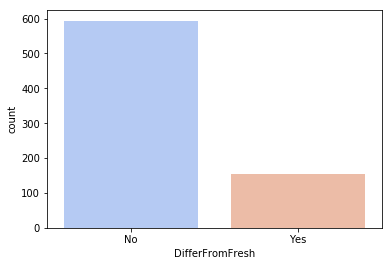

In [577]:
sns.countplot(df['DifferFromFresh'], palette='coolwarm')

** From the countplot, we can see the dataset is not balanced. The importance of the few examples of class 'Yes' is raised when we evaluate classification results later. **

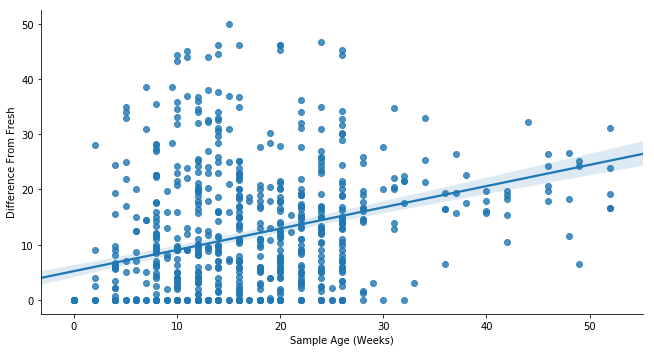

In [623]:
sns.lmplot('Sample Age (Weeks)', 'Difference From Fresh',data=df)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

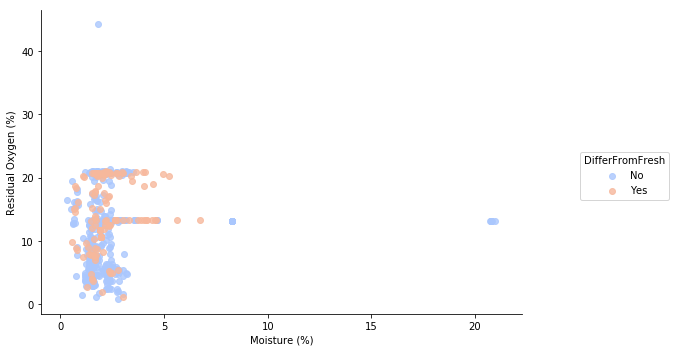

In [622]:
sns.lmplot(x='Moisture (%)',y='Residual Oxygen (%)',hue='DifferFromFresh', data=df,palette='coolwarm',fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

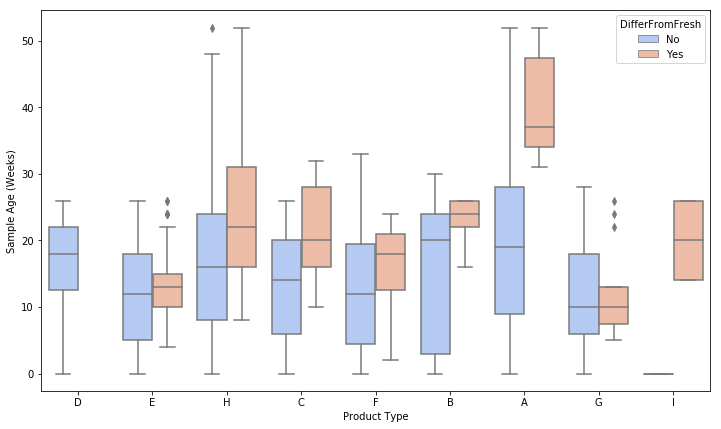

In [578]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Product Type', y='Sample Age (Weeks)', hue='DifferFromFresh', data=df,palette='coolwarm')

/Users/liudingning/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


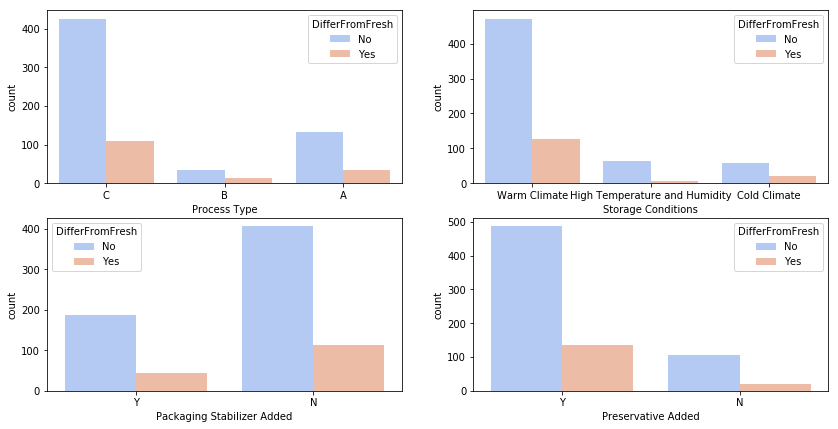

In [611]:
fig, ax =plt.subplots(2,2, figsize=(14,7))
sns.countplot(x='Process Type',  hue='DifferFromFresh', data=df,palette='coolwarm', ax=ax[0,0])
sns.countplot(x='Storage Conditions',  hue='DifferFromFresh', data=df,palette='coolwarm', ax=ax[0,1])
sns.countplot(x='Packaging Stabilizer Added',  hue='DifferFromFresh', data=df,palette='coolwarm', ax=ax[1,0])
sns.countplot(x='Preservative Added',  hue='DifferFromFresh', data=df,palette='coolwarm', ax=ax[1,1])
fig.show()

From regression plots and countplots, we hardly can see any pattern for classifying classes of freshness. So we should try different classification algorithm and take every factor into account for precisely classify.

In [529]:
df.drop('Sample Age (Weeks)',axis=1, inplace=True )

We also convert categorical variable into dummy variables.

In [478]:
df.drop(['Sample ID','Difference From Fresh'],axis=1,inplace=True)
cat_features = ['Product Type','Base Ingredient','Process Type', 'Storage Conditions', 'Packaging Stabilizer Added','Transparent Window in Package', 'Preservative Added','DifferFromFresh']
data = pd.get_dummies(df, columns=cat_features, drop_first=True)
data.shape

(749, 25)

In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 25 columns):
Study Number                                        749 non-null int64
Processing Agent Stability Index                    749 non-null float64
Moisture (%)                                        749 non-null float64
Residual Oxygen (%)                                 749 non-null float64
Hexanal (ppm)                                       749 non-null float64
Product Type_B                                      749 non-null uint8
Product Type_C                                      749 non-null uint8
Product Type_D                                      749 non-null uint8
Product Type_E                                      749 non-null uint8
Product Type_F                                      749 non-null uint8
Product Type_G                                      749 non-null uint8
Product Type_H                                      749 non-null uint8
Product Type_I                     

## Classification

We can try different machine learning methods for supervised classsification problem.(KNN, SVM, Randomforest, Logistic Regression)

In [480]:
from sklearn.model_selection import train_test_split

**Use train_test_split to split your data into a training set and a testing set.**

In [481]:
X = data.drop('DifferFromFresh_Yes',axis=1)
y = data['DifferFromFresh_Yes']

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### 1. Logistic Regression

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

** Train and fit a logistic regression model on the training set.**

In [484]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

** Predict values for the testing data, create a classification report for the model. **

In [485]:
logreg_pred = logreg.predict(X_test)

In [486]:
print(classification_report(y_test, logreg_pred))

             precision    recall  f1-score   support

          0       0.81      1.00      0.90       201
          1       0.00      0.00      0.00        47

avg / total       0.66      0.81      0.73       248



/Users/liudingning/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [487]:
print(confusion_matrix(y_test, logreg_pred))

[[201   0]
 [ 47   0]]


### 2. Random Forest

** Training a Decision Tree Model **

Let's start by training a single decision tree first.

In [488]:
from sklearn.tree import DecisionTreeClassifier

In [489]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Create predictions from the test set and create a classification report and a confusion matrix.**

In [490]:
dtc_pred = dtc.predict(X_test)

In [491]:
print(classification_report(y_test, dtc_pred))

             precision    recall  f1-score   support

          0       0.87      0.90      0.88       201
          1       0.49      0.40      0.44        47

avg / total       0.79      0.81      0.80       248



In [492]:
print(confusion_matrix(y_test, dtc_pred))

[[181  20]
 [ 28  19]]


** Training the Random Forest model **

Now its time to train our model. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [493]:
from sklearn.ensemble import RandomForestClassifier

In [494]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

** Predict the class of DifferFromFresh for the X_test data.**

In [495]:
pred_rfc = rfc.predict(X_test)

In [496]:
print(classification_report(pred_rfc,y_test))

             precision    recall  f1-score   support

          0       0.92      0.87      0.89       213
          1       0.40      0.54      0.46        35

avg / total       0.85      0.82      0.83       248



In [497]:
print(confusion_matrix(pred_rfc,y_test))

[[185  28]
 [ 16  19]]


### 3. SVM

In [498]:
from sklearn.svm import SVC

** Train a Support Vector Machine Classifier  **

In [499]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

** Get predictions from the model and create a confusion matrix and a classification report.**

In [500]:
svm_pred = svm.predict(X_test)
print(confusion_matrix(y_test, svm_pred))
print()
print(classification_report(y_test, svm_pred))

[[193   8]
 [ 35  12]]

             precision    recall  f1-score   support

          0       0.85      0.96      0.90       201
          1       0.60      0.26      0.36        47

avg / total       0.80      0.83      0.80       248



** The model performs ok, but we can use GridSearch then tune the parameters to try to get even better. **

In [501]:
from sklearn.model_selection import GridSearchCV

In [502]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [503]:
grid_pred = grid.predict(X_test)
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [504]:
print(confusion_matrix(y_test, grid_pred))
print()
print(classification_report(y_test, grid_pred))

[[194   7]
 [ 36  11]]

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       201
          1       0.61      0.23      0.34        47

avg / total       0.80      0.83      0.79       248



### 4. KNN
** Standardize the variables **

In [505]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('DifferFromFresh_Yes',axis=1))
scaled = scaler.transform(data.drop('DifferFromFresh_Yes',axis=1))
df_feature = pd.DataFrame(scaled, columns=data.columns[:-1])
df_feature.head()

,Study Number,Processing Agent Stability Index,Moisture (%),Residual Oxygen (%),Hexanal (ppm),Product Type_B,Product Type_C,Product Type_D,Product Type_E,Product Type_F,...,Base Ingredient_C,Base Ingredient_D,Base Ingredient_E,Base Ingredient_F,Process Type_B,Process Type_C,Storage Conditions_High Temperature and Humidity,Storage Conditions_Warm Climate,Packaging Stabilizer Added_Y,Preservative Added_Y
0,-1.805619,0.307955,3.139548,-0.046393,-0.904064,-0.284268,-0.261675,5.2733,-0.703569,-0.362519,...,-0.703569,-0.353022,-0.122087,-0.138013,-0.261675,0.634525,-0.318544,0.500417,1.502172,0.449719
1,-1.805619,0.307955,-0.348145,-1.752003,-2.234730,-0.284268,-0.261675,5.2733,-0.703569,-0.362519,...,-0.703569,-0.353022,-0.122087,-0.138013,-0.261675,0.634525,-0.318544,0.500417,-0.665703,0.449719
2,-1.805619,0.307955,-0.306504,-1.738622,-2.234730,-0.284268,-0.261675,5.2733,-0.703569,-0.362519,...,-0.703569,-0.353022,-0.122087,-0.138013,-0.261675,0.634525,-0.318544,0.500417,-0.665703,0.449719
3,-1.805619,0.243435,-0.327325,-1.039469,-2.273078,-0.284268,-0.261675,5.2733,-0.703569,-0.362519,...,-0.703569,-0.353022,-0.122087,-0.138013,-0.261675,0.634525,-0.318544,0.500417,-0.665703,0.449719
4,-1.805619,0.243435,-0.275274,-0.102805,-0.815864,-0.284268,-0.261675,5.2733,-0.703569,-0.362519,...,-0.703569,-0.353022,-0.122087,-0.138013,-0.261675,0.634525,-0.318544,0.500417,-0.665703,0.449719


**Use train_test_split to split your data into a training set and a testing set.**

In [506]:
Xk = df_feature
yk = data['DifferFromFresh_Yes']
Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk,yk,test_size=0.30,random_state=42)

#### Choosing K value 

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [507]:
from sklearn.neighbors import KNeighborsClassifier

In [508]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xk_train, yk_train)
    knn_pred = knn.predict(Xk_test)
    error_rate.append(np.mean(yk_test != knn_pred))

**Now create the following plot to visualize error rate.**

Text(0,0.5,'Error Rate')

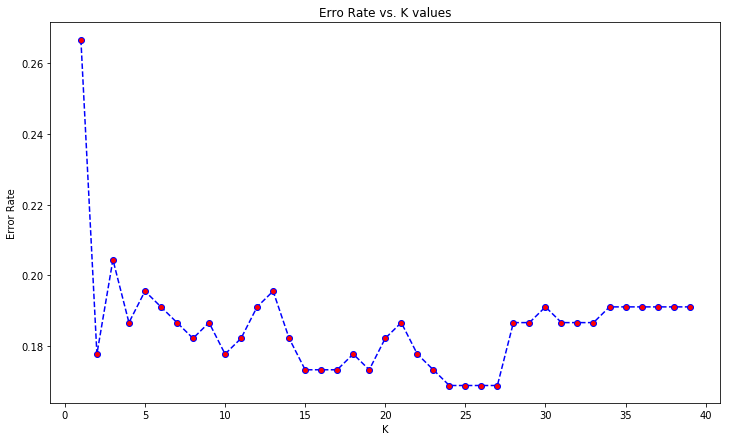

In [509]:
plt.figure(figsize=(12,7))
plt.plot(range(1,40), error_rate, linestyle='--',color='blue', marker='o',markerfacecolor='red')
plt.title('Erro Rate vs. K values')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Retrain my model with the best K value 24 and print classification report and the confusion matrix.**

In [510]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(Xk_train, yk_train)
knn_pred = knn.predict(Xk_test)
print('With K=24')
print()
print(confusion_matrix(yk_test, knn_pred))
print()
print(classification_report(yk_test, knn_pred))

With K=24

[[182   0]
 [ 38   5]]

             precision    recall  f1-score   support

          0       0.83      1.00      0.91       182
          1       1.00      0.12      0.21        43

avg / total       0.86      0.83      0.77       225



## Model Evaluation

### Accuracy

In [518]:

print('The accuracy of Logistics Regression Model : ', round(sum(logreg_pred == y_test)/len(y_test),2))
print('The accuracy of Random Forest : ', round(sum(pred_rfc == y_test)/len(y_test),2))
print('The accuracy of SVM (C=10, gamma=0.1) : ', round(sum(svm_pred == y_test)/len(y_test),2))
print('The accuracy of KNN: ', round(sum(knn_pred == yk_test)/len(yk_test),2))

The accuracy of Logistics Regression Model :  0.81
The accuracy of Random Forest :  0.82
The accuracy of SVM (C=10, gamma=0.1) :  0.83
The accuracy of KNN:  0.83


### Classification Report & Confusion Matrix

** The precision is the ratio ** $$ \frac{tp}{tp + fp}$$ 
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 


** The recall is the ratio ** $$\frac{tp}{tp + fn}$$ 
The recall is intuitively the ability of the classifier to find all the positive samples. 


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

** $$F_{1} = \frac{2*(precision * recall)}{(precision + recall)}$$ **

In [519]:
print('The F1 Score of Logistics Regression Model : 0.73')
print('The F1 Score of Random Forest : 0.83')
print('The F1 Score of KNN : 0.79')
print('The F1 Score of SVM (C=10, gamma=0.1): 0.77')

The F1 Score of Logistics Regression Model : 0.73
The F1 Score of Random Forest : 0.83
The F1 Score of KNN : 0.79
The F1 Score of SVM (C=10, gamma=0.1): 0.77


** Overall, the Random Forest performs best among four methods of classification. **